#### Studying Bayesian Networks to Design Belief Bases for Knowledge Representation

### The Bayesian state of mind:

<i>As data is being sampled, an agent collects probabilisitc data
from the environment, using it's sensors. This statistical data 
represents a model of the environment. It serves as the evidence
allowing us to reweigh the prior beliefs. </i>

For small N, inference is much more unstable: frequentist estimates have more variance and larger confidence intervals. This is where Bayesian analysis excels. By introducing a prior, and returning probabilities (instead of a scalar estimate), we preserve the uncertainty that reflects the instability of statistical inference of a small N dataset.

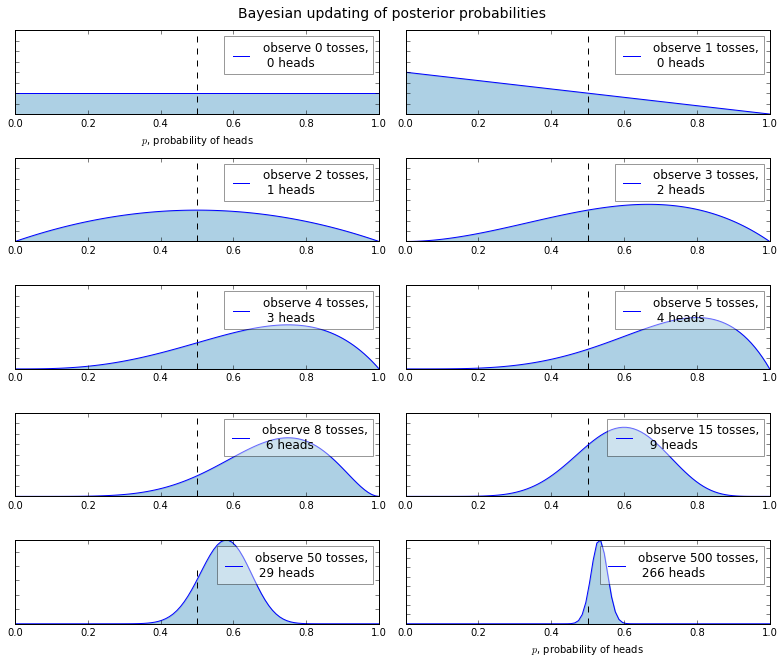

In [2]:
# Chapter 1
"""
Suppose, naively, that you are unsure about the probability of heads in a coin flip 
(spoiler alert: it's 50%). You believe there is some true underlying ratio, call it pp,
but have no prior opinion on what pp might be.

We begin to flip a coin, and record the observations: either HH or TT. 
This is our observed data. An interesting question to ask is how our inference 
changes as we observe more and more data? More specifically, what do our posterior 
probabilities look like when we have little data, versus when we have lots of data.

"""

# The code below can be passed over, as it is currently not important, plus it
# uses advanced topics we have not covered yet. LOOK AT PICTURE, MICHAEL!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)/2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()